In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
import time
from IPython import display
%matplotlib inline

# Exploring probabilities with coin flips

We want to simulate flipping a coin some number of times (N) to see the number of heads we get.

In [10]:
nheads = 0
for i in range(0,50):
    if np.random.random() > 0.5:
        nheads += 1
print(nheads)

29


If we make this into a function, we can start to run multiple coin-flip trials.

#### What do you expect the ditribution of the number of heads to look like?

In [11]:
def get_nheads(nflips):
    nheads = 0
    for i in range(nflips):
        if np.random.random() > 0.5:
            nheads += 1
    return nheads

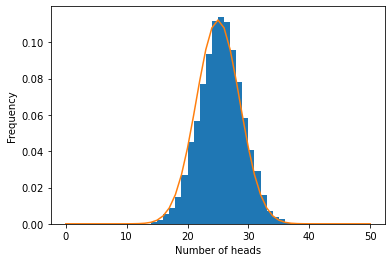

24.9973
3.510511744746056


In [27]:
nheads_exp = []
ntests = 10000
nflips = 50
for i in range(ntests):
    iheads = get_nheads(nflips)
    nheads_exp.append(iheads)

plt.hist(nheads_exp, bins = (max(nheads_exp)-min(nheads_exp)), density = True)
plt.ylabel("Frequency")
plt.xlabel("Number of heads")

p = .5
x = np.array(range(nflips+1))
plt.plot(x, binom.pmf(x, nflips, p))

plt.show()

print(np.mean(nheads_exp))
print(np.std(nheads_exp))

In [23]:
np.sqrt(nflips*p*(1-p))

3.5355339059327378

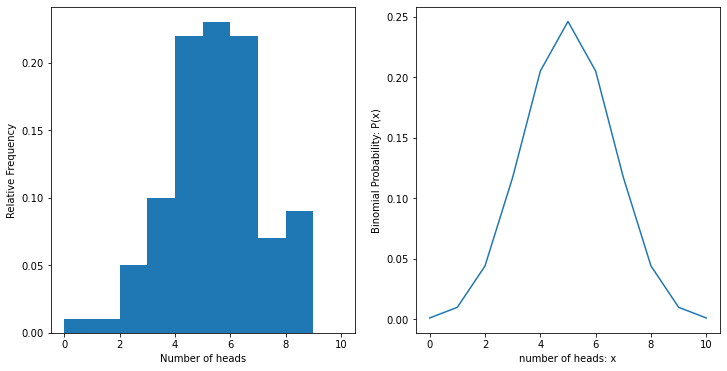

In [29]:
plt.ion()
fig1 = plt.figure(1, figsize=(12,6))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)
fig1.canvas.draw()

nheads_exp = []
ntests = 100
nflips = 10

p = .5
x = np.array(range(nflips+1))
ax2.plot(x, binom.pmf(x, nflips, p))
ax2.set_ylabel("Binomial Probability: P(x)")
ax2.set_xlabel("number of heads: x")

for i in range(ntests):
    iheads = get_nheads(nflips)
    nheads_exp.append(iheads)

    ax1.clear()
    ax1.hist(nheads_exp, range=(0,nflips), bins = nflips, density=True)
    ax1.set_ylabel("Relative Frequency")
    ax1.set_xlabel("Number of heads")
    fig1.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.05)


How do you think the mean and variance of this distribution compares with our ideal case?

In [ ]:
print("mean = ",np.mean(nheads_exp))
print("std. dev. = ",np.std(nheads_exp))

## Judging the fairness of a coin

Now how can we determine if a coin is fair?

In [33]:
def get_nheads_weighted(nflips, weight):
    nheads = 0
    for i in range(nflips):
        if np.random.random() > weight:
            nheads += 1
    return nheads

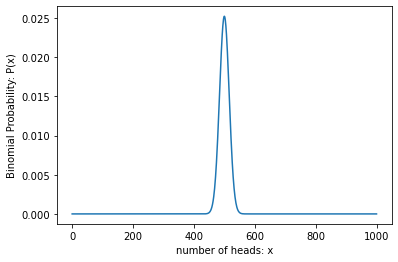

572
Fair coin: ave. nheads = 500.0, sigma = 15.811388300841896
Nheads between 468 and 531
2-sigma prob. to be fair =  0.9569647612128784


In [86]:
fairness_weight = 0.45

nflips = 1000

p = .5
x = np.array(range(nflips+1))
plt.plot(x, binom.pmf(x, nflips, p))
plt.ylabel("Binomial Probability: P(x)")
plt.xlabel("number of heads: x")
plt.show()

print(get_nheads_weighted(nflips, fairness_weight))

fair_mean = nflips*p
fair_sigma = np.sqrt(fair_mean*(1-p))

print("Fair coin: ave. nheads = {}, sigma = {}".format(fair_mean,fair_sigma))

bsum = 0
for x in range(int(fair_mean-2*fair_sigma), int(fair_mean+2*fair_sigma)+1):
    bsum += binom.pmf(x, nflips, p)

print("Nheads between {} and {}".format(int(fair_mean-2*fair_sigma),int(fair_mean+2*fair_sigma)))
print("2-sigma prob. to be fair = ",bsum)


## Running many experiments

What if we tried running this same experiment many times? 

Can we do a better job testing our coin this way?

In [59]:
def get_mean(ntests, nflips):
    nheads_exp = []
    for i in range(ntests):
        iheads = get_nheads(nflips)
        nheads_exp.append(iheads)

    return nheads_exp

In [96]:
ntests = 100
nflips = 10
test_means = []
nexperiments = 100

#plt.ion()
#fig1 = plt.figure(figsize=(12,5))
#ax1 = fig1.add_subplot(121)
#fig1.canvas.draw()

for i in range(nexperiments):
    nheads_exp = get_mean(ntests, nflips)
    test_means.append(np.mean(nheads_exp))

#    ax1.clear()
#    ax1.hist(test_means, bins = nflips, density=True)
#    ax1.set_ylabel("Relative Frequency")
#    ax1.set_xlabel("Mean number of heads")
#    fig1.canvas.draw()
#    display.display(plt.gcf())
#    display.clear_output(wait=True)
#    time.sleep(0.05)

mu = np.mean(test_means)
sigma = np.std(test_means)
print("Average of the distributions of mean number of heads = {} +/- {}".format(mu,sigma))

Average of the distributions of mean number of heads = 4.9965 +/- 0.1453985900894503


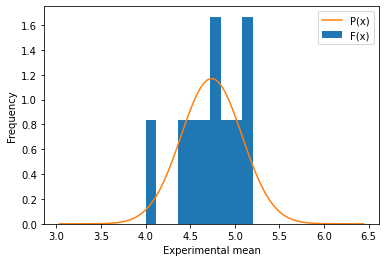

In [90]:
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
plt.hist(test_means, bins = nflips, density=True, label="F(x)")
plt.plot(x,y, label="P(x)")
plt.ylabel("Frequency")
plt.xlabel("Experimental mean")
plt.legend()
plt.show()

#1.61/np.sqrt(100)

In [63]:
def get_weighted_mean(ntests, nflips, weight):
    nheads_exp = []
    for i in range(ntests):
        iheads = get_nheads_weighted(nflips, weight)
        nheads_exp.append(iheads)

    return nheads_exp

Average of the distributions of mean number of heads = 5.507400000000001 +/- 0.16374748853035884


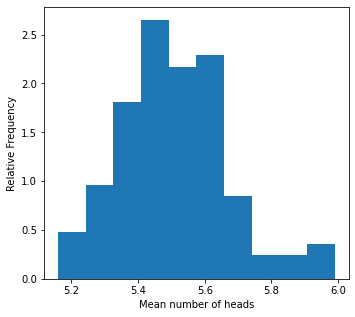

In [98]:
ntests = 100
nflips = 10
test_means = []
nexperiments = 100

weight = 0.45

plt.ion()
fig1 = plt.figure(figsize=(12,5))
ax1 = fig1.add_subplot(121)
fig1.canvas.draw()

for i in range(nexperiments):
    nheads_exp = get_weighted_mean(ntests, nflips, weight)
    test_means.append(np.mean(nheads_exp))

    ax1.clear()
    ax1.hist(test_means, bins = nflips, density=True)
    ax1.set_ylabel("Relative Frequency")
    ax1.set_xlabel("Mean number of heads")
    fig1.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.05)

mu = np.mean(test_means)
sigma = np.std(test_means)
print("Average of the distributions of mean number of heads = {} +/- {}".format(mu,sigma))

# Next: what about a 4-sided die

Now I want you to break out into groups and come up with a plan for how you would set up this same kind of experiment for a 4-sided die.

You don't need to write the code, just a set of steps - what you would implement with code (pseudo-code)

In [100]:
nfaces = [0,0,0,0]
for i in range(0,50):
    roll = np.random.random()
    if roll < 0.25:
        nfaces[0] += 1
    if roll > 0.25 and roll < 0.5:
        nfaces[1] += 1
    if roll > 0.5 and roll < 0.75:
        nfaces[2] += 1
    if roll > 0.75:
        nfaces[3] += 1
print(nfaces)
print(np.mean(nfaces))

[15, 16, 10, 9]
12.5


In [ ]:
def get_nfaces(nrolls):
    nfaces = [0,0,0,0]
    for i in range(nrolls):
        roll = np.random.random()
        if roll < 0.25:
            nfaces[0] += 1
        if roll > 0.25 and roll < 0.5:
            nfaces[1] += 1
        if roll > 0.5 and roll < 0.75:
            nfaces[2] += 1
        if roll > 0.75:
            nfaces[3] += 1
    return nfaces

In [ ]:
dice_exp = []
labels = ['1','2','3','4']
ntests = 500
nrolls = 50
for i in range(ntests):
    ifaces = get_nfaces(nrolls)
    dice_exp.append(ifaces)

for i in range(4):
    plt.hist(np.array(dice_exp)[:,i], label=labels[i], alpha=0.5)
    print(np.mean(np.array(dice_exp)[:,i]))

plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Number of heads")
plt.show()


In [ ]:
    #ax1.hist(nheads_exp, bins = (max(nheads_exp)-min(nheads_exp)))
    #ax1.set_ylabel("Frequency")
    #ax1.set_xlabel("Number of heads")
    #plt.show()
    #plt.draw()
    #plt.pause(0.1)
